In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [34]:
# DFT of image rotated by 90 degrees.
def get_DFT_mat(v, inverse=False):
    v_np = np.array(v)
    DFT_size = v.shape[1]
    DFT_mat = np.empty(shape=(DFT_size,DFT_size), dtype=complex)
    conjugate = 1 if inverse==False else -1
    w = np.power(np.e, (conjugate*2j)*np.pi/DFT_size, dtype=complex)
    for i in range(DFT_size):
        for j in range(DFT_size):
            DFT_mat[i,j] = np.power(w, i*j, dtype=complex)
    return (1/np.sqrt(DFT_size)) * np.transpose(DFT_mat @ np.transpose(v_np))

In [42]:
orig_img = Image.open(r"./mandril_original.png").convert('L')
dist_img = Image.open(r"./mandril_distorted.png").convert('L')
A = get_DFT_mat(np.matrix(orig_img)) / 255.0
B = get_DFT_mat(np.matrix(dist_img)) / 255.0
A_real = np.real(A)
B_real = np.real(B)
A_imag = np.imag(A)
B_imag = np.imag(B)


[[ 7.8745098  -0.03568787 -0.10323869 ... -0.17203992 -0.10323869
  -0.03568787]
 [ 7.63455882  0.03838141 -0.27936375 ... -0.33840087 -0.27936375
   0.03838141]
 [ 7.66102941  0.23594549 -0.38018968 ... -0.47002475 -0.38018968
   0.23594549]
 ...
 [ 8.90367647 -1.27443019  0.44196803 ...  0.41206037  0.44196803
  -1.27443019]
 [ 9.22156863 -1.39397127  0.51301504 ...  0.40698835  0.51301504
  -1.39397127]
 [ 4.34901961 -0.62863745  0.1734675  ...  0.15855287  0.1734675
  -0.62863745]]


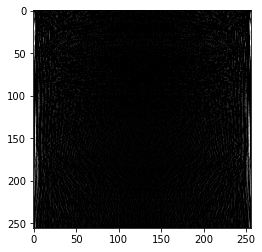

In [43]:
plt.imshow(A_real, cmap='gray', vmin=0, vmax=1)
print(A_real)

[[ 7.58676471e+00 -2.68236153e-03  4.07695407e-02 ...  1.08456552e-01
   4.07695407e-02 -2.68236153e-03]
 [ 7.42230392e+00 -1.70290199e-01  1.23443939e-01 ...  2.39147089e-02
   1.23443939e-01 -1.70290199e-01]
 [ 7.52156863e+00 -2.63432974e-01  2.09628388e-02 ... -1.66397483e-01
   2.09628388e-02 -2.63432974e-01]
 ...
 [ 8.28308824e+00 -7.43422265e-01 -6.96028086e-01 ...  3.40738528e-01
  -6.96028086e-01 -7.43422265e-01]
 [ 8.72230392e+00 -6.19628476e-01 -5.58280407e-01 ...  4.95878810e-01
  -5.58280407e-01 -6.19628476e-01]
 [ 4.22034314e+00 -2.30422076e-01 -2.16753184e-01 ...  1.81302972e-01
  -2.16753184e-01 -2.30422076e-01]]


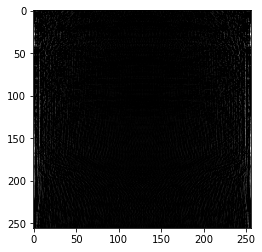

In [44]:
plt.imshow(B_real, cmap='gray', vmin=0, vmax=1)
print(B_real)

[[ 0.         -0.28132443 -0.19663176 ...  0.24359968  0.19663176
   0.28132443]
 [ 0.         -0.1378996  -0.26133547 ...  0.24717654  0.26133547
   0.1378996 ]
 [ 0.         -0.09276918 -0.17071947 ...  0.19869777  0.17071947
   0.09276918]
 ...
 [ 0.          0.32886683  0.42546767 ... -0.32443441 -0.42546767
  -0.32886683]
 [ 0.          0.35260105  0.45502627 ... -0.34285522 -0.45502627
  -0.35260105]
 [ 0.          0.15071815  0.27788192 ... -0.16523749 -0.27788192
  -0.15071815]]


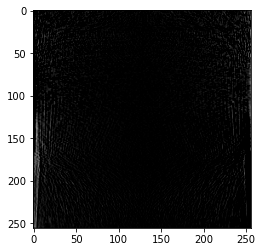

In [45]:
plt.imshow(A_imag, cmap='gray', vmin=0, vmax=1)
print(A_imag)

[[ 0.         -0.41520942 -0.32531697 ...  0.37599962  0.32531697
   0.41520942]
 [ 0.         -0.33684952 -0.56465525 ...  0.38366225  0.56465525
   0.33684952]
 [ 0.         -0.17560952 -0.766552   ...  0.29948492  0.766552
   0.17560952]
 ...
 [ 0.         -0.12045298  0.85814368 ...  0.11387369 -0.85814368
   0.12045298]
 [ 0.         -0.10657024  0.99457157 ...  0.01176912 -0.99457157
   0.10657024]
 [ 0.         -0.02476625  0.48035466 ... -0.08746829 -0.48035466
   0.02476625]]


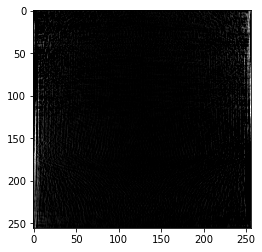

In [46]:
plt.imshow(B_imag, cmap='gray', vmin=0, vmax=1)
print(B_imag)

In [51]:
#since A's singular values are non-zero, it is of full rank.
u, s, vh = np.linalg.svd(A)
print(s)

[1.31514748e+02 1.86755186e+01 1.21572972e+01 8.49310805e+00
 6.94798872e+00 5.55860703e+00 5.03207268e+00 4.55177301e+00
 4.37029322e+00 4.05972491e+00 3.93051791e+00 3.65928768e+00
 3.48961345e+00 3.25685681e+00 3.20784594e+00 3.12196461e+00
 3.04123939e+00 2.99570540e+00 2.87456495e+00 2.77682170e+00
 2.73717650e+00 2.69576586e+00 2.62409559e+00 2.58409493e+00
 2.56432284e+00 2.51272345e+00 2.50019365e+00 2.43874611e+00
 2.41596415e+00 2.37927470e+00 2.33107354e+00 2.29525938e+00
 2.26074361e+00 2.23818983e+00 2.19095492e+00 2.16894588e+00
 2.14446932e+00 2.10026181e+00 2.07739491e+00 2.02696885e+00
 2.00248131e+00 1.95803881e+00 1.92949592e+00 1.90580533e+00
 1.88080183e+00 1.84633141e+00 1.83255733e+00 1.82087784e+00
 1.79897671e+00 1.77983697e+00 1.75984435e+00 1.74880079e+00
 1.72298205e+00 1.68786608e+00 1.65375341e+00 1.62336421e+00
 1.61079634e+00 1.59001746e+00 1.56979415e+00 1.54450854e+00
 1.52351834e+00 1.50976906e+00 1.49094953e+00 1.48176051e+00
 1.46819956e+00 1.463321

[[-1.65100575e-13 -7.17935159e-05 -8.26622653e-05 ...  1.86937368e-04
   8.26622653e-05  7.17935158e-05]
 [-1.30145688e-01  6.26839767e-01 -2.66407351e-01 ... -2.25431539e-02
  -3.09533999e-02 -1.63972379e-02]
 [-1.27759252e-01  2.60834706e-01  5.85771756e-01 ... -2.43392058e-02
  -5.51367899e-02 -5.52605799e-03]
 ...
 [ 5.68853021e-02  4.76128392e-02  6.76156523e-02 ... -1.62878742e-01
  -6.43935411e-01  7.48543816e-02]
 [ 1.27759252e-01  5.52605799e-03  5.51367899e-02 ...  1.28594837e-01
  -5.85771756e-01 -2.60834706e-01]
 [ 1.30145688e-01  1.63972379e-02  3.09533999e-02 ...  7.00682116e-03
   2.66407351e-01 -6.26839767e-01]]


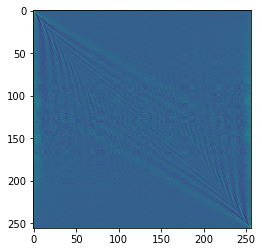

In [60]:
#least squares solution
C = np.linalg.pinv(A) @ B
plt.imshow(np.real(C))
print(np.imag(C))
reconst_img = get_DFT_mat(B @ np.linalg.inv(C), inverse=True)

true_reconst_img = np.fft.ifft(np.fft.fft(dist_img) @ np.linalg.inv(np.linalg.pinv(np.fft.fft(orig_img)) @ np.fft.fft(dist_img)))

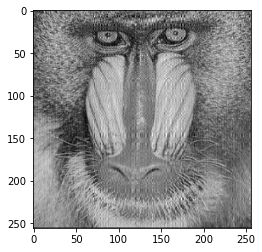

In [53]:
plt.imshow(np.real(reconst_img), cmap='gray', vmin=0, vmax=1)

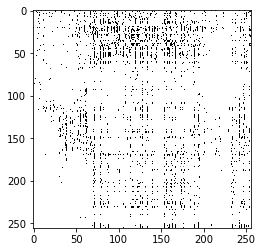

In [54]:
plt.imshow(np.real(true_reconst_img), cmap='gray', vmin=0, vmax=1)

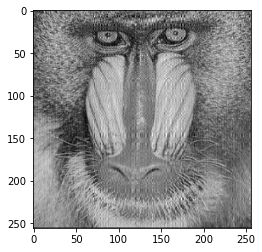

In [55]:
plt.imshow(np.real(reconst_img), cmap='gray', vmin=0, vmax=1)

[[118.70889813-2.96495734e+01j  47.34513582+2.85148114e+01j
   79.87589379+1.11585183e+01j ...  97.00644245-1.35486812e+01j
  103.51076605-6.87891147e+01j 139.52118063+1.75421256e+01j]
 [105.2989161 -3.01388580e+01j  60.25035047+1.05440660e+01j
   68.34448475+1.39625026e+01j ... 103.17504042-2.20738029e+01j
   95.31284433-9.13413859e+01j  69.83241646+3.06863041e+01j]
 [ 86.91489458-1.21695006e+01j 114.47109707-3.13235062e+00j
   67.69272819+4.62808164e+00j ...  91.31109517-8.70702252e+00j
   88.7138584 -1.18748937e+02j 132.18637726+2.29531188e+01j]
 ...
 [107.54705787-3.65421832e+00j 153.33527359-6.33970332e+00j
  128.68983274+9.20874815e+00j ...  92.32037854-1.66903811e+00j
  115.23399053-1.66252155e+01j  88.3746526 +6.32591156e+00j]
 [146.08422518-6.46384835e+00j 146.72638177+4.32903924e+00j
  123.26926548+8.84462579e+00j ... 102.01617593+1.07236374e-01j
  101.16737585-8.00604090e+00j  79.79672725+5.41042009e+00j]
 [ 80.90325236-3.11479926e+00j  61.6776823 +6.03078878e+00j
   53.7927

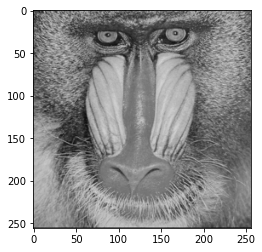

In [62]:
plt.imshow(np.matrix(orig_img), cmap='gray', vmin=0, vmax=255)
print((reconst_img) * 255)
print(np.matrix(orig_img))

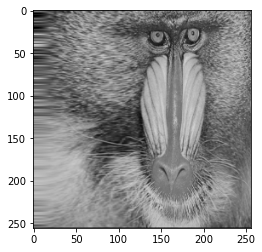

In [57]:
our_dist = get_DFT_mat(A @ C, inverse=True)
plt.imshow(np.real(our_dist), cmap='gray', vmin=0, vmax=1)

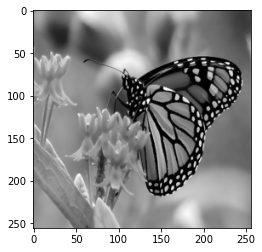

In [66]:
orig_butterfly = np.matrix(Image.open(r"./Butterfly_.png").convert('L'))
dist_butterfly = get_DFT_mat(get_DFT_mat(orig_butterfly) @ C,inverse=True)
plt.imshow(orig_butterfly, cmap='gray', vmin=0, vmax=255)

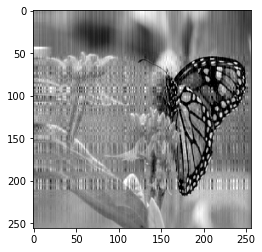

In [71]:
plt.imshow(np.real(dist_butterfly), cmap='gray', vmin=0, vmax=255)
plt.imsave("dist_butterfly.png",np.real(dist_butterfly), cmap='gray', vmin=0, vmax=255)